In [76]:
import numpy as np
import pandas as pd
#pd.set_option('display.max_rows', 100)
#pd.set_option('display.max_columns', 100)
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, Quad
from datetime import datetime
from math import pi
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, recall_score, precision_score
import random
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
t = time()

In [77]:
# Keras imports
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.convolutional import Convolution2D, MaxPooling2D, Conv1D, MaxPooling1D, AveragePooling1D, UpSampling1D
from keras.layers.recurrent import LSTM
from keras.layers import Bidirectional, TimeDistributed
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
from keras.optimizers import Adam, RMSprop
from keras.utils import np_utils, generic_utils
from sklearn.metrics import f1_score
from keras.models import Model
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras import regularizers
from keras.utils.np_utils import to_categorical
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping, Callback, ModelCheckpoint, LearningRateScheduler, ReduceLROnPlateau
from keras.layers.advanced_activations import LeakyReLU
from weightnorm import data_based_init, AdamWithWeightnorm
from keras.utils import np_utils
import keras.backend as K
from itertools import product
from functools import partial
from keras.layers.noise import GaussianNoise
from keras.layers.advanced_activations import ELU
from keras.constraints import maxnorm
from numpy.random import seed
from sklearn.preprocessing import minmax_scale
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense, Flatten, Input, merge, add
from keras.models import load_model

In [78]:
from sklearn import model_selection
from sklearn.preprocessing import Imputer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn import cross_validation
from sklearn.model_selection import KFold
from matplotlib import pyplot
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GroupKFold

In [79]:
%matplotlib inline
%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [178]:
# Import custom scripts and functions
%aimport model_performance_evaluation
%aimport custom_metrics
%aimport data_processing
%aimport make_keras_generators

In [167]:
# Create list of target csvs
# data = ["data/EURJPY1440.csv", "data/EURGBP1440.csv","data/USDCAD1440.csv","data/GBPUSD1440.csv",\
#         "data/EURUSD14402.csv","data/USDCHF1440.csv","data/EURAUD14402.csv","data/AUDUSD1440.csv",\
#                "data/GBPJPY1440.csv", "data/NZDUSD1440.csv", "data/EURUSD240.csv", 
#        ]

data = ['data/usdjpy1440.csv',
'data/usdchf1440.csv',
'data/nzdusd1440.csv',
'data/gpbjpy1440.csv',
'data/eurusd1440.csv',
'data/eurusd240.csv',
'data/euraud1440.csv',
'data/audusd1440.csv',]

# allows us to easily modify how many days ahead and before we look:
lookforward = 3 # how many days we look forward
lookback = 7 # how many days we look back

        
# Choose features to be used in feature generation function
feature_generation_channels = ["O", "H", "L", "C", "V"] 

X, y, df_ohlc_and_rectangles, groups,\
groups_count, scalers, groups_dict,\
scaled_columns, df_data_unscaled,\
y_rects, proximal_columns, distal_columns = data_processing.prepare_data(data, 
                                                                 lookforward, 
                                                                 lookback,
                                                                 feature_generation_channels,
                                                                 lag_data=1,
                                                                 change_open_close=1, 
                                                                 range_high_low=1,
                                                                 rolling_mean_range_HL=1,
                                                                 range_high_close=0,
                                                                 std_dev=0,
                                                                 rolling_mean=1,
                                                                 change_open_close_shift=0,
                                                                 range_high_low_shift=0,
                                                                 range_high_close_shift=0,
                                                                 diff_shift=1,
                                                                 rolling_mean_shift=1,
                                                                 std_dev_shift=0,
                                                                 center=False
                                                                )

Processing:  data/usdjpy1440.csv Number  1  of  8
We now have: (0, 0) rows of data!
Reading in Date, OHLCV, Supply/Demand
Renaming df_ohlc column headers for clarity
Reading in Rectangle data
Renaming df_rects column headers for clarity
Identifying supply/demand with supply_or_demand func: data/usdjpy1440.csv (2681, 14)
~~~
Identifying zone ends with zone_ender func: data/usdjpy1440.csv (2681, 16)
~~~
Your df_norm columns: Index(['O', 'H', 'L', 'C', 'V'], dtype='object')
Your df_non_norm columns: Index(['Epoch Date', 'Supply/Demand', 'zz0tfh', 'zz1tfh', 'zz2tfh',
       'Epoch Date Start', 'Epoch Date End', 'Proximal', 'Distal',
       'supply_demand',
       ...
       'zz2tfh_match_-3_L', 'zz2tfh_match_-2_L', 'zz2tfh_match_-1_L',
       'zz2tfh_match_0_L', 'zz2tfh_match_1_L', 'zz2tfh_match_2_L',
       'zz2tfh_match_3_L', 'zz2tfh_match_4_L', 'zz2tfh_match_5_L',
       'zz2tfh_match_6_L'],
      dtype='object', length=151)


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/pandas/core/generic.py:3675: UserWarning: the "axis" argument is deprecated and will be removed inv0.13; this argument has no effect
  warn('the "axis" argument is deprecated and will be removed in'
/Users/production204/Github/the-internet-of-forex/data_processing.py:299: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  lookback,
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/pandas/core/generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Generating features:  Difference between open and close
Shape is now: (2681, 6)
~~~
Generating features:  Range between high and low
Shape is now: (2681, 7)
~~~
Generating features:  Generic lagged data
Generating features:  Diffs over time for lookforward/lookback range
Generating features:  Rolling mean for yesterday, today, tomorrow range
Your df_scale_with_PCA: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 1

Identifying zone ends with zone_ender func: data/nzdusd1440.csv (4983, 16)
~~~
Your df_norm columns: Index(['O', 'H', 'L', 'C', 'V'], dtype='object')
Your df_non_norm columns: Index(['Epoch Date', 'Supply/Demand', 'zz0tfh', 'zz1tfh', 'zz2tfh',
       'Epoch Date Start', 'Epoch Date End', 'Proximal', 'Distal',
       'supply_demand',
       ...
       'zz2tfh_match_-3_L', 'zz2tfh_match_-2_L', 'zz2tfh_match_-1_L',
       'zz2tfh_match_0_L', 'zz2tfh_match_1_L', 'zz2tfh_match_2_L',
       'zz2tfh_match_3_L', 'zz2tfh_match_4_L', 'zz2tfh_match_5_L',
       'zz2tfh_match_6_L'],
      dtype='object', length=151)
Generating features:  Difference between open and close
Shape is now: (4983, 6)
~~~
Generating features:  Range between high and low
Shape is now: (4983, 7)
~~~
Generating features:  Generic lagged data
Generating features:  Diffs over time for lookforward/lookback range
Generating features:  Rolling mean for yesterday, today, tomorrow range
Your df_scale_with_PCA: [0, 1, 2, 3, 4, 5, 6

Merging the scaled data and the unscalable data back together with pd.concat: data/gpbjpy1440.csv (4978, 310)
Finished: data/gpbjpy1440.csv (4978, 310)
--------------------------------
Processing:  data/eurusd1440.csv Number  5  of  8
We now have: (17529, 310) rows of data!
Reading in Date, OHLCV, Supply/Demand
Renaming df_ohlc column headers for clarity
Reading in Rectangle data
Renaming df_rects column headers for clarity
Identifying supply/demand with supply_or_demand func: data/eurusd1440.csv (4949, 14)
~~~
Identifying zone ends with zone_ender func: data/eurusd1440.csv (4949, 16)
~~~
Your df_norm columns: Index(['O', 'H', 'L', 'C', 'V'], dtype='object')
Your df_non_norm columns: Index(['Epoch Date', 'Supply/Demand', 'zz0tfh', 'zz1tfh', 'zz2tfh',
       'Epoch Date Start', 'Epoch Date End', 'Proximal', 'Distal',
       'supply_demand',
       ...
       'zz2tfh_match_-3_L', 'zz2tfh_match_-2_L', 'zz2tfh_match_-1_L',
       'zz2tfh_match_0_L', 'zz2tfh_match_1_L', 'zz2tfh_match_2_L',


Identifying zone ends with zone_ender func: data/euraud1440.csv (4624, 16)
~~~
Your df_norm columns: Index(['O', 'H', 'L', 'C', 'V'], dtype='object')
Your df_non_norm columns: Index(['Epoch Date', 'Supply/Demand', 'zz0tfh', 'zz1tfh', 'zz2tfh',
       'Epoch Date Start', 'Epoch Date End', 'Proximal', 'Distal',
       'supply_demand',
       ...
       'zz2tfh_match_-3_L', 'zz2tfh_match_-2_L', 'zz2tfh_match_-1_L',
       'zz2tfh_match_0_L', 'zz2tfh_match_1_L', 'zz2tfh_match_2_L',
       'zz2tfh_match_3_L', 'zz2tfh_match_4_L', 'zz2tfh_match_5_L',
       'zz2tfh_match_6_L'],
      dtype='object', length=151)
Generating features:  Difference between open and close
Shape is now: (4624, 6)
~~~
Generating features:  Range between high and low
Shape is now: (4624, 7)
~~~
Generating features:  Generic lagged data
Generating features:  Diffs over time for lookforward/lookback range
Generating features:  Rolling mean for yesterday, today, tomorrow range
Your df_scale_with_PCA: [0, 1, 2, 3, 4, 5, 6

Finished loading data! You'll probably still want to remove some columns though


In [168]:
# Save data into backup X, y so we don't have to reload it 

X_backup = X
y_backup = y

In [169]:
X = X_backup
y = y_backup

In [170]:
# Delete columns that are only 0
X_ = X.loc[:, (X != 0).any(axis=0)]

In [171]:
X = X_

In [172]:
labels_distal = [col for col in list(y) if col.startswith('Distal_')]
labels_proximal = [col for col in list(y) if col.startswith('Proximal_')]
labels_rectangle_here = [col for col in list(y) if col.startswith('rectangle_')]

In [173]:
features_to_remove = ['Epoch Date', 'Supply/Demand', 'Object Name', 'Epoch Date Start', 'L_diff_0', 'O_diff_0',
                      'Epoch Date End', 'Proximal', 'Distal', 'change', 'V_diff_0', 'C_diff_0', 'H_diff_0',
                      #'O', 'H', 'L', 'C', 'V',
                      'csv_origin_tag', 'range_high_close_range_0', 'change_open_close', 'range_high_close', 
                      'rectangle_here', 
                      'supply_demand', 'group']


X = data_processing.drop_non_features(X, features_to_remove, zero_columns=1)

In [127]:
important_cols = 

# reorder columns
def set_column_sequence(dataframe, seq, front=True):
    '''Takes a dataframe and a subsequence of its columns,
       returns dataframe with seq as first columns if "front" is True,
       and seq as last columns if "front" is False.
    '''
    cols = seq[:] # copy so we don't mutate seq
    for x in dataframe.columns:
        if x not in cols:
            if front: #we want "seq" to be in the front
                #so append current column to the end of the list
                cols.append(x)
            else:
                #we want "seq" to be last, so insert this
                #column in the front of the new column list
                #"cols" we are building:
                cols.insert(0, x)
return dataframe[cols]

set_column_sequence(X, )

In [151]:
# Create train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y['rectangle_here'], test_size=0.1)

# Create validation split from train split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.05)

In [152]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3, shuffle=True)

### Automatic feature selection with random forests

Iteration number:  1
Number of features:  19


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.2s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.2s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.2s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   36.2s finished


[ 0.9033617   0.90491948  0.90247907]


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   18.5s finished


n 19 Important features(> 10 % of max importance):n ['C_diff_-3' 'H_diff_-3' 'O_diff_-2' 'C_diff_-1' 'C_diff_-2' 'L_diff_-3'
 'C_diff_1' 'L_diff_-2' 'change_open_close_diff_-1' 'H_diff_-2' 'O_diff_-1'
 'O_diff_-3' 'C_diff_2' 'L_diff_-1' 'H_diff_-1' 'L_diff_1'
 'change_open_close_diff_-3' 'H_diff_1' 'change_open_close_diff_-2']
nFeatures sorted by importance (DESC):n ['C_diff_-3' 'H_diff_-3' 'O_diff_-2' 'C_diff_-1' 'L_diff_-3'
 'change_open_close_diff_-1' 'C_diff_-2' 'C_diff_1' 'H_diff_-2' 'C_diff_2'
 'L_diff_-2' 'O_diff_-1' 'O_diff_-3' 'L_diff_1' 'L_diff_-1' 'H_diff_1'
 'H_diff_-1' 'change_open_close_diff_-3' 'change_open_close_diff_-2']


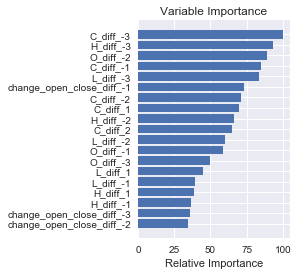

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:52: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:53: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


Iteration number:  2
Number of features:  19


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.5s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.6s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.4s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   37.0s finished


[ 0.90167948  0.90243237  0.90477942]


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   18.7s finished


n 19 Important features(> 15 % of max importance):n ['C_diff_-3' 'H_diff_-3' 'O_diff_-2' 'C_diff_-1' 'L_diff_-3'
 'change_open_close_diff_-1' 'C_diff_-2' 'C_diff_1' 'H_diff_-2' 'C_diff_2'
 'L_diff_-2' 'O_diff_-1' 'O_diff_-3' 'L_diff_1' 'L_diff_-1' 'H_diff_1'
 'H_diff_-1' 'change_open_close_diff_-3' 'change_open_close_diff_-2']
nFeatures sorted by importance (DESC):n ['C_diff_-3' 'H_diff_-3' 'C_diff_-1' 'O_diff_-2' 'C_diff_-2' 'L_diff_-3'
 'change_open_close_diff_-1' 'C_diff_1' 'L_diff_-2' 'C_diff_2' 'O_diff_-1'
 'H_diff_-2' 'O_diff_-3' 'L_diff_1' 'H_diff_1' 'H_diff_-1' 'L_diff_-1'
 'change_open_close_diff_-3' 'change_open_close_diff_-2']


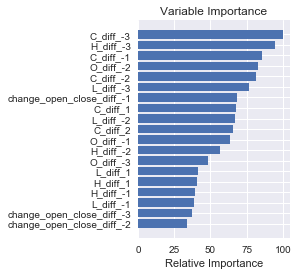

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:52: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:53: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


Iteration number:  3
Number of features:  19


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.7s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.6s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.3s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   37.2s finished


[ 0.90323087  0.90195134  0.90383086]


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   19.3s finished


n 19 Important features(> 20 % of max importance):n ['C_diff_-3' 'H_diff_-3' 'C_diff_-1' 'O_diff_-2' 'C_diff_-2' 'L_diff_-3'
 'change_open_close_diff_-1' 'C_diff_1' 'L_diff_-2' 'C_diff_2' 'O_diff_-1'
 'H_diff_-2' 'O_diff_-3' 'L_diff_1' 'H_diff_1' 'H_diff_-1' 'L_diff_-1'
 'change_open_close_diff_-3' 'change_open_close_diff_-2']
nFeatures sorted by importance (DESC):n ['C_diff_-3' 'L_diff_-3' 'C_diff_-1' 'O_diff_-2' 'H_diff_-3' 'C_diff_-2'
 'C_diff_1' 'change_open_close_diff_-1' 'C_diff_2' 'O_diff_-1' 'H_diff_-2'
 'L_diff_-2' 'O_diff_-3' 'H_diff_-1' 'L_diff_1' 'H_diff_1' 'L_diff_-1'
 'change_open_close_diff_-3' 'change_open_close_diff_-2']


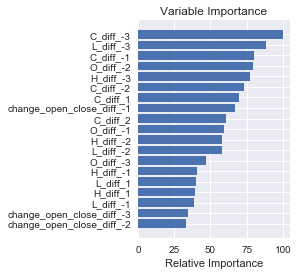

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:52: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:53: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


Iteration number:  4
Number of features:  19


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.6s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.4s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.4s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   36.9s finished


[ 0.90430004  0.90391567  0.90261769]


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   18.7s finished


n 19 Important features(> 25 % of max importance):n ['C_diff_-3' 'L_diff_-3' 'C_diff_-1' 'O_diff_-2' 'H_diff_-3' 'C_diff_-2'
 'C_diff_1' 'change_open_close_diff_-1' 'C_diff_2' 'O_diff_-1' 'H_diff_-2'
 'L_diff_-2' 'O_diff_-3' 'H_diff_-1' 'L_diff_1' 'H_diff_1' 'L_diff_-1'
 'change_open_close_diff_-3' 'change_open_close_diff_-2']
nFeatures sorted by importance (DESC):n ['C_diff_-3' 'H_diff_-3' 'C_diff_-1' 'L_diff_-3' 'O_diff_-2' 'C_diff_-2'
 'change_open_close_diff_-1' 'C_diff_1' 'C_diff_2' 'L_diff_-2' 'O_diff_-1'
 'H_diff_-2' 'O_diff_-3' 'L_diff_1' 'H_diff_-1' 'H_diff_1' 'L_diff_-1'
 'change_open_close_diff_-3' 'change_open_close_diff_-2']


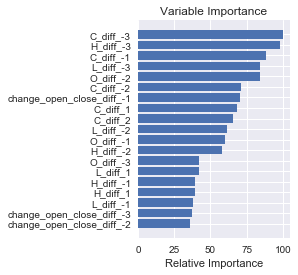

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:52: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:53: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


Iteration number:  5
Number of features:  19


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.5s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.3s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.4s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   36.9s finished


[ 0.90378423  0.90404452  0.90243659]


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   19.3s finished


n 19 Important features(> 30 % of max importance):n ['C_diff_-3' 'H_diff_-3' 'C_diff_-1' 'L_diff_-3' 'O_diff_-2' 'C_diff_-2'
 'change_open_close_diff_-1' 'C_diff_1' 'C_diff_2' 'L_diff_-2' 'O_diff_-1'
 'H_diff_-2' 'O_diff_-3' 'L_diff_1' 'H_diff_-1' 'H_diff_1' 'L_diff_-1'
 'change_open_close_diff_-3' 'change_open_close_diff_-2']
nFeatures sorted by importance (DESC):n ['C_diff_-3' 'H_diff_-3' 'L_diff_-3' 'C_diff_-2' 'O_diff_-2' 'C_diff_-1'
 'change_open_close_diff_-1' 'C_diff_1' 'C_diff_2' 'L_diff_-2' 'H_diff_-2'
 'O_diff_-1' 'O_diff_-3' 'H_diff_1' 'H_diff_-1' 'L_diff_-1' 'L_diff_1'
 'change_open_close_diff_-3' 'change_open_close_diff_-2']


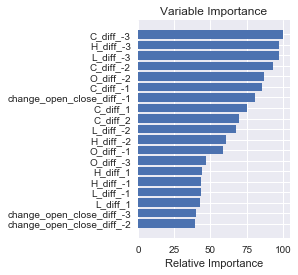

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:52: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:53: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


Iteration number:  6
Number of features:  19


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.5s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.9s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.5s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   37.5s finished


[ 0.90412589  0.90312451  0.90303759]


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   18.3s finished


n 19 Important features(> 35 % of max importance):n ['C_diff_-3' 'H_diff_-3' 'L_diff_-3' 'C_diff_-2' 'O_diff_-2' 'C_diff_-1'
 'change_open_close_diff_-1' 'C_diff_1' 'C_diff_2' 'L_diff_-2' 'H_diff_-2'
 'O_diff_-1' 'O_diff_-3' 'H_diff_1' 'H_diff_-1' 'L_diff_-1' 'L_diff_1'
 'change_open_close_diff_-3' 'change_open_close_diff_-2']
nFeatures sorted by importance (DESC):n ['C_diff_-3' 'H_diff_-3' 'L_diff_-3' 'O_diff_-2' 'C_diff_-1' 'C_diff_-2'
 'L_diff_-2' 'C_diff_1' 'O_diff_-1' 'change_open_close_diff_-1' 'C_diff_2'
 'H_diff_-2' 'O_diff_-3' 'H_diff_1' 'L_diff_1' 'H_diff_-1' 'L_diff_-1'
 'change_open_close_diff_-2' 'change_open_close_diff_-3']


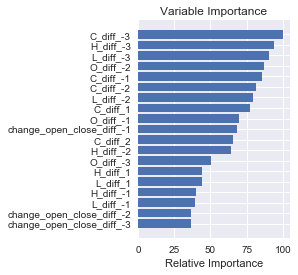

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:52: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:53: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


Iteration number:  7
Number of features:  19


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.2s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.0s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.0s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   35.6s finished


[ 0.90446965  0.90230007  0.90501124]


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   18.1s finished


n 16 Important features(> 40 % of max importance):n ['C_diff_-3' 'H_diff_-3' 'L_diff_-3' 'O_diff_-2' 'C_diff_-1' 'C_diff_-2'
 'L_diff_-2' 'C_diff_1' 'O_diff_-1' 'change_open_close_diff_-1' 'C_diff_2'
 'H_diff_-2' 'O_diff_-3' 'H_diff_1' 'L_diff_1' 'L_diff_-1']
nFeatures sorted by importance (DESC):n ['C_diff_-3' 'H_diff_-3' 'O_diff_-2' 'L_diff_-3' 'C_diff_-2' 'C_diff_-1'
 'change_open_close_diff_-1' 'C_diff_1' 'O_diff_-1' 'C_diff_2' 'H_diff_-2'
 'L_diff_-2' 'O_diff_-3' 'H_diff_1' 'L_diff_1' 'L_diff_-1']


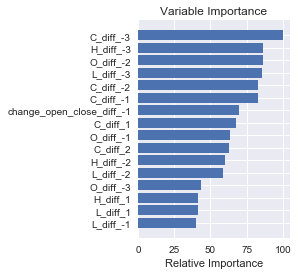

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:52: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:53: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


Iteration number:  8
Number of features:  16


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.1s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.0s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.0s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   35.5s finished


[ 0.90643093  0.90641699  0.9016529 ]


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   18.1s finished


n 13 Important features(> 45 % of max importance):n ['C_diff_-3' 'H_diff_-3' 'O_diff_-2' 'L_diff_-3' 'C_diff_-2' 'C_diff_-1'
 'change_open_close_diff_-1' 'C_diff_1' 'O_diff_-1' 'C_diff_2' 'H_diff_-2'
 'L_diff_-2' 'O_diff_-3']
nFeatures sorted by importance (DESC):n ['C_diff_-3' 'O_diff_-2' 'H_diff_-3' 'L_diff_-3' 'C_diff_1' 'C_diff_-2'
 'C_diff_-1' 'L_diff_-2' 'change_open_close_diff_-1' 'H_diff_-2' 'C_diff_2'
 'O_diff_-1' 'O_diff_-3']


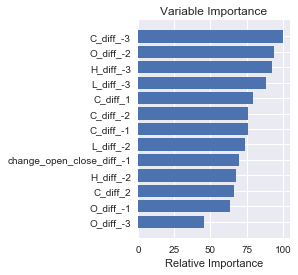

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:52: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:53: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


Iteration number:  9
Number of features:  13


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.4s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.4s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.4s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   27.5s finished


[ 0.90249674  0.90454642  0.90241031]


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   14.3s finished


n 13 Important features(> 50 % of max importance):n ['C_diff_-3' 'O_diff_-2' 'H_diff_-3' 'L_diff_-3' 'C_diff_1' 'C_diff_-2'
 'C_diff_-1' 'L_diff_-2' 'change_open_close_diff_-1' 'H_diff_-2' 'C_diff_2'
 'O_diff_-1' 'O_diff_-3']
nFeatures sorted by importance (DESC):n ['C_diff_-3' 'O_diff_-2' 'L_diff_-3' 'C_diff_-1' 'H_diff_-3' 'C_diff_2'
 'C_diff_1' 'C_diff_-2' 'change_open_close_diff_-1' 'L_diff_-2' 'O_diff_-1'
 'H_diff_-2' 'O_diff_-3']


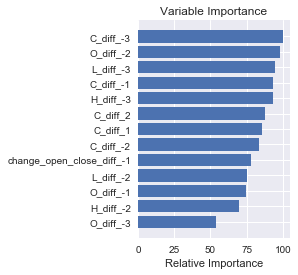

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:52: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:53: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


Iteration number:  10
Number of features:  13


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.6s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.5s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.5s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   28.0s finished


[ 0.90398995  0.90227096  0.9051547 ]


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   13.5s finished


n 12 Important features(> 55 % of max importance):n ['C_diff_-3' 'O_diff_-2' 'L_diff_-3' 'C_diff_-1' 'H_diff_-3' 'C_diff_2'
 'C_diff_1' 'C_diff_-2' 'change_open_close_diff_-1' 'L_diff_-2' 'O_diff_-1'
 'H_diff_-2']
nFeatures sorted by importance (DESC):n ['C_diff_-3' 'O_diff_-2' 'H_diff_-3' 'C_diff_-1' 'C_diff_-2' 'C_diff_2'
 'C_diff_1' 'L_diff_-3' 'change_open_close_diff_-1' 'O_diff_-1' 'L_diff_-2'
 'H_diff_-2']


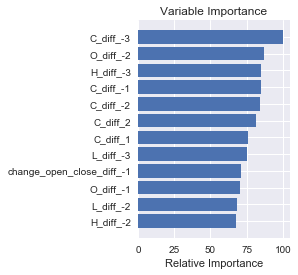

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:52: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:53: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


Iteration number:  11
Number of features:  12


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.4s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.4s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.4s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   27.5s finished


[ 0.90559124  0.90528772  0.90220215]


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   13.4s finished


n 12 Important features(> 60 % of max importance):n ['C_diff_-3' 'O_diff_-2' 'H_diff_-3' 'C_diff_-1' 'C_diff_-2' 'C_diff_2'
 'C_diff_1' 'L_diff_-3' 'change_open_close_diff_-1' 'O_diff_-1' 'L_diff_-2'
 'H_diff_-2']
nFeatures sorted by importance (DESC):n ['C_diff_-3' 'H_diff_-3' 'O_diff_-2' 'L_diff_-3' 'C_diff_-1' 'C_diff_2'
 'C_diff_1' 'L_diff_-2' 'H_diff_-2' 'change_open_close_diff_-1' 'O_diff_-1'
 'C_diff_-2']


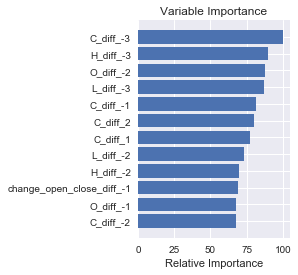

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:52: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:53: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


Iteration number:  12
Number of features:  12


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.4s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.3s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.4s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   27.5s finished


[ 0.90372957  0.90623199  0.90264773]


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   13.4s finished


n 11 Important features(> 65 % of max importance):n ['C_diff_-3' 'H_diff_-3' 'O_diff_-2' 'L_diff_-3' 'C_diff_-1' 'C_diff_2'
 'C_diff_1' 'H_diff_-2' 'change_open_close_diff_-1' 'O_diff_-1' 'C_diff_-2']
nFeatures sorted by importance (DESC):n ['C_diff_-3' 'O_diff_-2' 'H_diff_-3' 'C_diff_2' 'C_diff_-1' 'C_diff_-2'
 'L_diff_-3' 'C_diff_1' 'O_diff_-1' 'H_diff_-2' 'change_open_close_diff_-1']


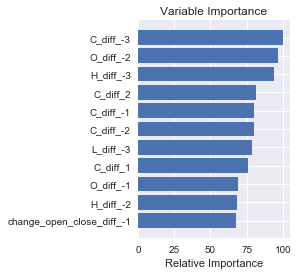

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:52: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:53: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


Iteration number:  13
Number of features:  11


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.3s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.4s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.4s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   27.4s finished


[ 0.90570073  0.9041813   0.90306723]


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   13.6s finished


n 9 Important features(> 70 % of max importance):n ['C_diff_-3' 'O_diff_-2' 'H_diff_-3' 'C_diff_2' 'C_diff_-1' 'C_diff_-2'
 'L_diff_-3' 'C_diff_1' 'change_open_close_diff_-1']
nFeatures sorted by importance (DESC):n ['C_diff_-3' 'O_diff_-2' 'H_diff_-3' 'L_diff_-3' 'C_diff_-1' 'C_diff_-2'
 'C_diff_2' 'C_diff_1' 'change_open_close_diff_-1']


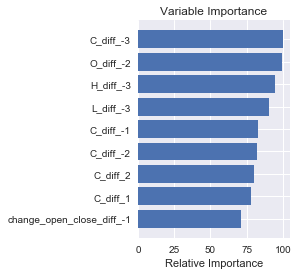

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:52: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:53: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


Iteration number:  14
Number of features:  9


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.5s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.2s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.2s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   27.3s finished


[ 0.90460115  0.90439599  0.89985678]


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   13.3s finished


n 7 Important features(> 75 % of max importance):n ['C_diff_-3' 'O_diff_-2' 'H_diff_-3' 'L_diff_-3' 'C_diff_-1' 'C_diff_-2'
 'C_diff_1']
nFeatures sorted by importance (DESC):n ['O_diff_-2' 'H_diff_-3' 'C_diff_-2' 'C_diff_1' 'L_diff_-3' 'C_diff_-3'
 'C_diff_-1']


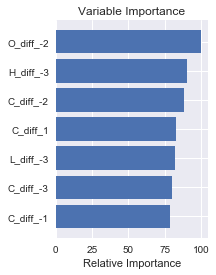

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:52: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:53: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


Iteration number:  15
Number of features:  7


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    6.0s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.8s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.9s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   20.1s finished


[ 0.89141335  0.89401521  0.89501062]


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    9.5s finished


n 6 Important features(> 80 % of max importance):n ['O_diff_-2' 'H_diff_-3' 'C_diff_1' 'L_diff_-3' 'C_diff_-3' 'C_diff_-1']
nFeatures sorted by importance (DESC):n ['C_diff_1' 'C_diff_-3' 'C_diff_-1' 'O_diff_-2' 'H_diff_-3' 'L_diff_-3']


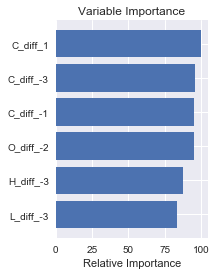

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:52: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:53: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


Iteration number:  16
Number of features:  6


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.8s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.8s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.9s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   19.9s finished


[ 0.89305255  0.88881958  0.89404421]


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    9.7s finished


n 6 Important features(> 85 % of max importance):n ['C_diff_1' 'C_diff_-3' 'C_diff_-1' 'O_diff_-2' 'H_diff_-3' 'L_diff_-3']
nFeatures sorted by importance (DESC):n ['C_diff_1' 'C_diff_-1' 'C_diff_-3' 'O_diff_-2' 'L_diff_-3' 'H_diff_-3']


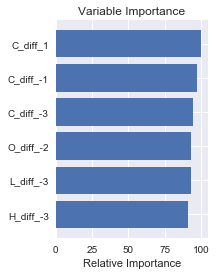

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:52: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:53: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


Iteration number:  17
Number of features:  6


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.9s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.8s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.9s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   19.9s finished


[ 0.89602685  0.89036769  0.89131478]


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    9.5s finished


n 4 Important features(> 90 % of max importance):n ['C_diff_1' 'C_diff_-1' 'C_diff_-3' 'L_diff_-3']
nFeatures sorted by importance (DESC):n ['C_diff_-1' 'C_diff_1' 'C_diff_-3' 'L_diff_-3']


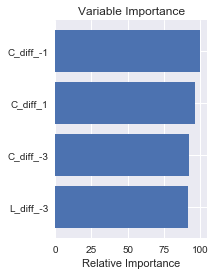

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:52: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:53: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


Iteration number:  18
Number of features:  4


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.8s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.9s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.8s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   19.8s finished


[ 0.89022918  0.88607236  0.88829705]


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    9.8s finished


n 1 Important features(> 95 % of max importance):n ['C_diff_-1']
nFeatures sorted by importance (DESC):n ['C_diff_-1']


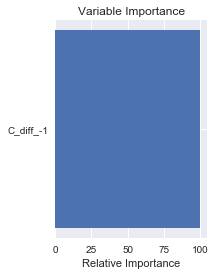

Iteration number:  19
Number of features:  1


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:52: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:53: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.8s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.6s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.9s finished
[Parallel(n_jo

[ 0.77297831  0.77752836  0.77471896]


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.0s finished


n 0 Important features(> 100 % of max importance):n []
nFeatures sorted by importance (DESC):n []


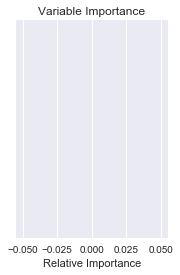

Iteration number:  20
Number of features:  0


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:52: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:53: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


ValueError: Found array with 0 feature(s) (shape=(32763, 0)) while a minimum of 1 is required.

In [75]:
fi_threshold = 5
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score

for i in range(0, 20):
    print("Iteration number: ", i+1)
    print("Number of features: ", len(list(X_train)))
    # Fit a random forest with (mostly) default parameters to determine feature importance
    forest = RandomForestClassifier(oob_score=True, n_estimators=100, class_weight='balanced', verbose=1)
    
    if i == 5 or 10 or 15 or 20:
        scores = cross_val_score(forest, X_train, y_train, cv=skf, scoring='f1_weighted', verbose=1)
        print(scores)

    forest.fit(X_train, y_train)
    feature_importance = forest.feature_importances_

    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())

    # A threshold below which to drop features from the final data set. Specifically, this number represents
    # the percentage of the most important feature's importance value

    fi_threshold = fi_threshold + 5

    # Get the indexes of all features over the importance threshold
    important_idx = np.where(feature_importance > fi_threshold)[0]

    # Create a list of all the feature names above the importance threshold
    features_list = np.array(list(X_train))
    important_features = features_list[important_idx]
    print("n", important_features.shape[0], "Important features(>", fi_threshold, "% of max importance):n", important_features)



    # Get the sorted indexes of important features
    sorted_idx = np.argsort(feature_importance[important_idx])[::-1]
    print("nFeatures sorted by importance (DESC):n", important_features[sorted_idx])

    # Adapted from http://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.subplot(1, 2, 2)
    plt.barh(pos, feature_importance[important_idx][sorted_idx[::-1]], align='center')
    plt.yticks(pos, important_features[sorted_idx[::-1]])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.draw()
    plt.show()

    # Remove non-important features from the feature set, and reorder those remaining
    X_train = X_train.ix[:, important_idx]
    X_train = X_train.ix[:, sorted_idx]



In [153]:
# Stack original X_train to 3dim for conv net
X_train = data_processing.X_to_Conv1D_arrays(X_train)
X_valid = data_processing.X_to_Conv1D_arrays(X_valid)
X_test = data_processing.X_to_Conv1D_arrays(X_test)

X:  (34884, 175, 1)
X:  <class 'numpy.ndarray'>
X:  (1837, 175, 1)
X:  <class 'numpy.ndarray'>
X:  (4081, 175, 1)
X:  <class 'numpy.ndarray'>


In [154]:
print (X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape)

(34884, 175, 1) (1837, 175, 1) (4081, 175, 1) (34884,) (1837,) (4081,)


### Conv1D for Rectangle_here

In [155]:
# Create generators and define batch_size and other hyperparams
batch_size = 32

# Create generators
train_gen = make_keras_generators.train_generator(X_train, y_train.values, batch_size)
valid_gen = make_keras_generators.valid_generator(X_valid, y_valid.values, batch_size)

input_shape = X_train.shape[1:3]
output_shape = 1
validation_steps = int(len(X_valid)/batch_size)+1
steps_per_epoch = int(len(X_train)/batch_size)+1
epochs = 100
multiplier = 1

validation_steps = int(len(X_valid)/batch_size)+1

class_weight={0:1., 1:7.}

In [156]:
mc_filepath = 'rectangle_here-july8{epoch:02d}-{val_fbeta_score:.2f}.h5'
mc = ModelCheckpoint(mc_filepath, 
                     monitor='val_fbeta_score', 
                     verbose=1, 
                     #save_weights_only=True,
                     period=10, mode='max',
                     save_best_only=False)

rlop = ReduceLROnPlateau(
                    monitor='val_loss', 
                    mode='min',
                    factor=0.9,
                    patience=10, 
                    min_lr=0.000001,
                    verbose=1,
                        )

es = EarlyStopping(
        monitor='val_loss',
        #min_delta=0.01,
        mode='min',
        patience=50,
        verbose=1)

from sklearn.metrics import roc_auc_score


class IntervalEvaluation(Callback):
    def __init__(self, validation_data=(), interval=10):
        super(Callback, self).__init__()

        self.interval = interval
        self.X_val, self.y_val = validation_data

    def on_epoch_end(self, epoch, logs={}):
        if epoch % self.interval == 0:
            y_pred_proba = self.model.predict_proba(self.X_val, verbose=0)
            y_pred = self.model.predict(self.X_val, verbose=0)
            score = roc_auc_score(self.y_val, y_pred_proba)
            print("----------------------------")
            print("Your classification report: ")
            print("----------------------------")            
            print(classification_report(self.y_val, y_pred > 0.5))
            print("interval evaluation - epoch: {:d} - ROC AUC score: {:.6f}".format(epoch, score))

ival = IntervalEvaluation(validation_data=(X_test, y_test), interval=2)

callbacks = [ es, mc, rlop, ival]

### Define the rectangle_here_model

In [157]:
#rectangle_here_model = load_model('rectangle_here-AE-july6-452pm-Conv1D-0.63.h5', custom_objects={'AdamWithWeightnorm': AdamWithWeightnorm, 'fbeta_score': custom_metrics.fbeta_score, 'recall': custom_metrics.recall, 'precision': custom_metrics.precision})

In [160]:
X_

,O,H,L,C,V,change_open_close,range_high_low,O_rolling_mean,H_rolling_mean,L_rolling_mean,...,zz0tfh_match_-1_L,zz0tfh_match_0_L,zz0tfh_match_2_L,zz0tfh_match_3_L,zz1tfh_match_-1_L,zz1tfh_match_0_L,zz1tfh_match_3_L,zz0tfh_match_0_C,zz1tfh_match_0_C,group
0,0.280553,0.269050,0.275368,0.276467,0.000284,0.004087,-0.006319,0.472214,0.467181,0.469443,...,False,False,False,False,False,False,False,False,False,0
1,0.274949,0.262114,0.271177,0.270847,0.000196,0.004101,-0.009063,0.472214,0.467181,0.469443,...,False,False,False,False,False,False,False,False,False,0
2,0.270625,0.257597,0.266824,0.264265,0.000155,0.006360,-0.009226,0.472214,0.467181,0.469443,...,False,False,False,False,False,False,False,False,False,0
3,0.264060,0.261791,0.266017,0.273737,0.000248,-0.009678,-0.004226,0.472214,0.467181,0.469443,...,False,False,False,False,False,False,False,False,False,0
4,0.273508,0.267437,0.275530,0.273898,0.000274,-0.000390,-0.008093,0.472214,0.467181,0.469443,...,False,False,False,False,False,False,False,False,False,0
5,0.273988,0.268727,0.273917,0.272774,0.000367,0.001214,-0.005190,0.272947,0.264453,0.271472,...,False,False,False,False,False,False,False,False,False,0
6,0.271746,0.259694,0.262309,0.261696,0.000307,0.010050,-0.002615,0.271479,0.262893,0.269296,...,False,False,False,False,False,False,False,False,False,0
7,0.261337,0.250339,0.260858,0.260572,0.000204,0.000765,-0.010520,0.269211,0.260931,0.267576,...,False,False,False,False,False,False,False,False,False,0
8,0.260217,0.249694,0.255699,0.254471,0.000269,0.005745,-0.006006,0.267476,0.259614,0.265722,...,False,False,False,False,False,False,False,False,False,0
9,0.254292,0.243241,0.252152,0.251421,0.000222,0.002871,-0.008911,0.265848,0.256522,0.263411,...,False,False,False,False,False,False,False,False,False,0


In [158]:
#Use this cell if we want to start from scratch
rectangle_here_model = Sequential()
rectangle_here_model.add(Bidirectional(LSTM(input_shape[0], return_sequences=True,
                                     recurrent_dropout=0.3, dropout=0.3), 
                                 input_shape=input_shape, 
                                 batch_input_shape=(None, X_train.shape[1], X_train.shape[2]))
                        )
rectangle_here_model.add(LSTM(4, return_sequences=False,
                                     recurrent_dropout=0.3, dropout=0.3))
rectangle_here_model.add(Dropout(0.3))
rectangle_here_model.add(Dense(output_shape, activation='sigmoid'))

In [159]:
class_weight={0:1., 1:8.}

rectangle_here_model.compile(optimizer=AdamWithWeightnorm(), 
              loss='binary_crossentropy',
                metrics = ['accuracy', 
                           custom_metrics.fbeta_score,
                           custom_metrics.recall,
                          custom_metrics.precision]
            )


history = rectangle_here_model.fit_generator(
                    train_gen,
                    steps_per_epoch=int(len(X_train)/batch_size)+1,
                    epochs=100,
                    verbose=1,
                    callbacks=callbacks,
                    validation_data = valid_gen,
                    class_weight = class_weight,
                    validation_steps = validation_steps
                   )

Epoch 1/100
  47/1091 [>.............................] - ETA: 1369s - loss: 14.1086 - acc: 0.0000e+00 - fbeta_score: 1.7986 - recall: 13617031.5569 - precision: 1.0000

KeyboardInterrupt: 

In [289]:
#rectangle_here_model.save('rectangle_here_model-Conv1D-07.06.17.350pm.h5')

In [304]:
preds, y_pred_proba = model_performance_evaluation.eval(rectangle_here_model, 
                                                        X_test, 
                                                        y_test.values, 
                                                        #weights='rectangle_here-Conv1D-19-0.61.h5',
                                                        batch_size=256, sensitivity=0.15, binary=1, sequential=0)

Your classification report: 
             precision    recall  f1-score   support

          0       0.97      0.89      0.93      5015
          1       0.51      0.78      0.62       734

avg / total       0.91      0.88      0.89      5749

-----------------------------
Log loss: 0.211732813311
F1 weighted: 0.887041710463
F1 macro: 0.772503777679
F1 micro: 0.876500260915
Accuracy score: 0.876500260915
Hamming Loss: 0.123499739085
ROC AUC SCORE: 0.932250659466
Your confusion matrix: 
[[4463  552]
 [ 158  576]]
-----------------------------


dict_keys(['loss', 'recall', 'val_fbeta_score', 'val_precision', 'val_loss', 'fbeta_score', 'val_recall', 'precision', 'acc', 'val_acc', 'lr'])


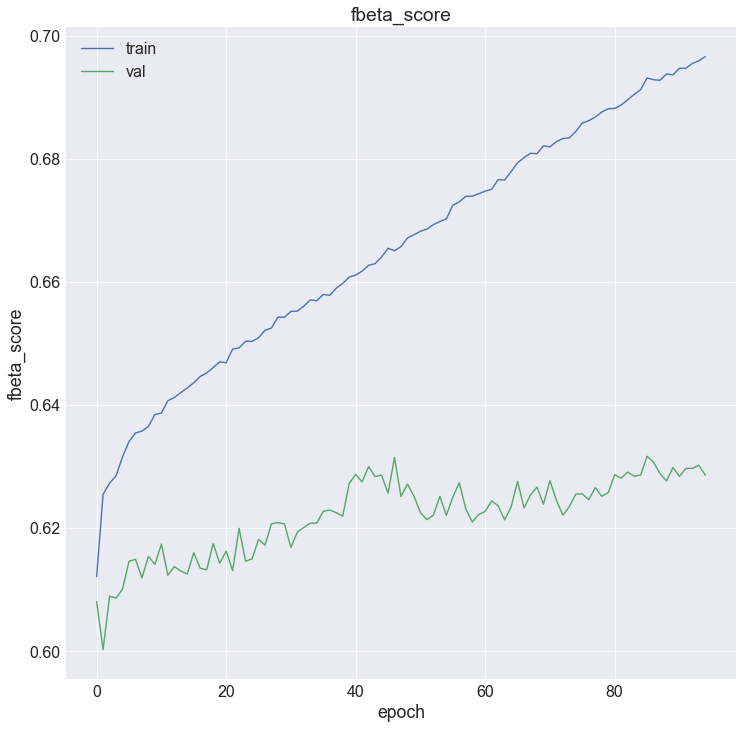

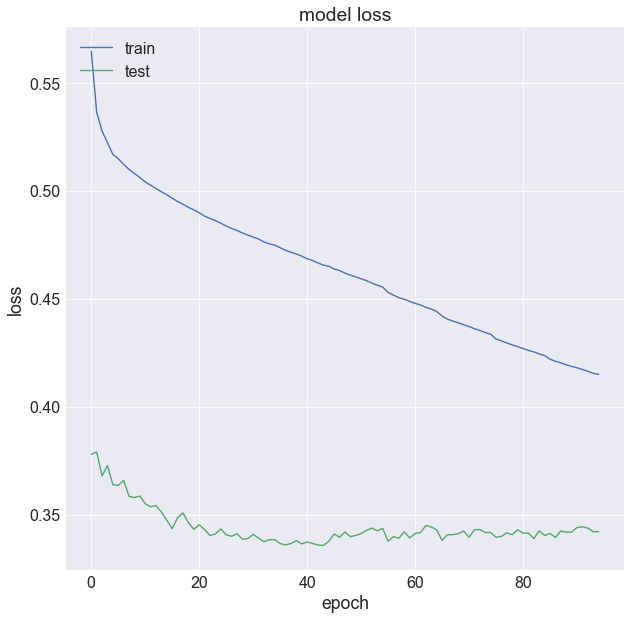

dict_keys(['loss', 'recall', 'val_fbeta_score', 'val_precision', 'val_loss', 'fbeta_score', 'val_recall', 'precision', 'acc', 'val_acc', 'lr'])


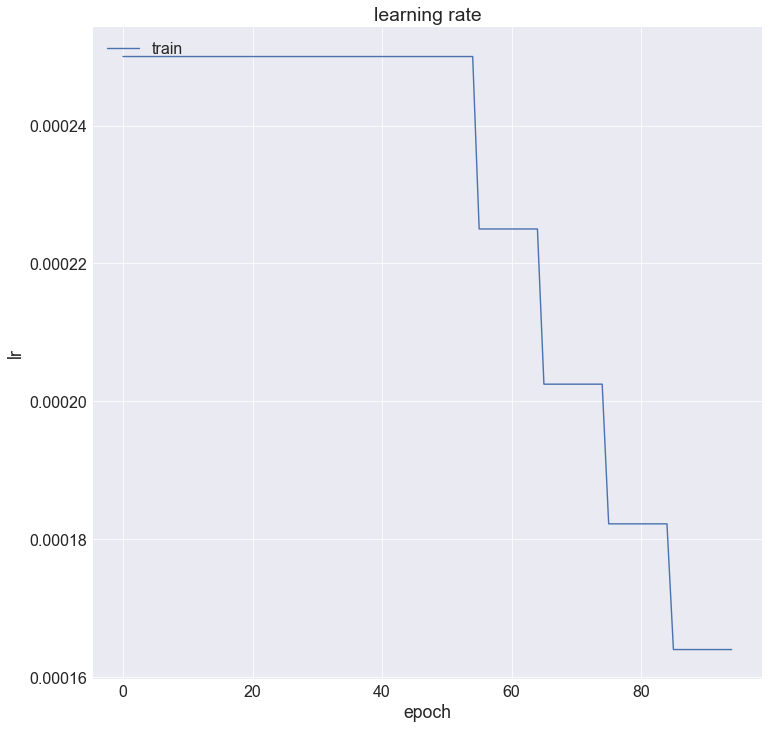

In [280]:
sns.set_context("paper", font_scale=2)
plt.figure(figsize=(12, 12))
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['fbeta_score'])
plt.plot(history.history['val_fbeta_score'])
plt.title('fbeta_score')
plt.ylabel('fbeta_score')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


# summarize history for loss
fig_loss = plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# show lr changing
sns.set_context("paper", font_scale=2)
plt.figure(figsize=(12, 12))
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['lr'])
#plt.plot(history.history['val_fbeta_score'])
plt.title('learning rate')
plt.ylabel('lr')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Make predictions on raw data and visualize

In [151]:
data = ['floyd-ignore/USDCAD1440.csv']

# allows us to easily modify how many days ahead and before we look:
lookforward = 6 # how many days we look forward
lookback = 6 # how many days we look back

        
# Choose features to be used in feature generation function
feature_generation_channels = ["O", "H", "L", "C", "V"] 

X, y, df_ohlc_and_rectangles, groups,\
groups_count, scalers, groups_dict,\
scaled_columns, df_data_unscaled,\
y_rects, proximal_columns, distal_columns = data_processing.prepare_data(data, 
                                                                 lookforward, 
                                                                 lookback,
                                                                 feature_generation_channels,
                                                                 lag_data=1,
                                                                 change_open_close=1, 
                                                                 range_high_low=1,
                                                                 rolling_mean_range_HL=1,
                                                                 range_high_close=1,
                                                                 std_dev=1,
                                                                 rolling_mean=1,
                                                                 change_open_close_shift=1,
                                                                 range_high_low_shift=0,
                                                                 range_high_close_shift=1,
                                                                 diff_shift=1,
                                                                 rolling_mean_shift=1,
                                                                 std_dev_shift=1,
                                                                 center=True
                                                                )

Processing:  floyd-ignore/USDCAD1440.csv Number  1  of  1
We now have: (0, 0) rows of data!
Reading in Date, OHLCV, Supply/Demand
Renaming df_ohlc column headers for clarity
Reading in Rectangle data
Renaming df_rects column headers for clarity
Identifying supply/demand with supply_or_demand func: floyd-ignore/USDCAD1440.csv (4943, 12)
~~~
Identifying zone ends with zone_ender func: floyd-ignore/USDCAD1440.csv (4943, 14)
~~~
Your df_norm columns: Index(['O', 'H', 'L', 'C', 'V'], dtype='object')
Your df_non_norm columns: Index(['Epoch Date', 'Supply/Demand', 'Object Name', 'Epoch Date Start',
       'Epoch Date End', 'Proximal', 'Distal', 'supply_demand',
       'rectangle_here', 'Proximal_match_-6_O',
       ...
       'Distal_match_-4_C', 'Distal_match_-3_C', 'Distal_match_-2_C',
       'Distal_match_-1_C', 'Distal_match_0_C', 'Distal_match_1_C',
       'Distal_match_2_C', 'Distal_match_3_C', 'Distal_match_4_C',
       'Distal_match_5_C'],
      dtype='object', length=105)
Generating 

/Users/production204/Github/the-internet-of-forex/data_processing.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_data["change_open_close"] = df_data["O"] - df_data["C"] # add change column, difference between open and close
/Users/production204/Github/the-internet-of-forex/data_processing.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_data["range_high_low"] = df_data["H"] - df_data["L"] # add range, difference between high and low


Shape is now: (4943, 7)
~~~
Generating features:  Range between high and low
Shape is now: (4943, 8)
~~~


/Users/production204/Github/the-internet-of-forex/data_processing.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_data["range_high_close"] = df_data["H"] - df_data["C"] # add range, difference between high and low
/Users/production204/Github/the-internet-of-forex/data_processing.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_data[label] =  df_data[each].rolling(window=6).std()
/Users/production204/Github/the-internet-of-forex/data_processing.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

Generating features:  Generic lagged data
Generating features:  Change over time for lookforward/lookback range
Generating features:  Range High-Close over time for lookforward/lookback range
Generating features:  Diffs over time for lookforward/lookback range
Generating features:  Rolling mean for yesterday, today, tomorrow range
Generating features:  Std deviation for yesterday, today, tomorrow range
Your df_scale_with_PCA: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135,

In [176]:
# Make list of features and label column names
features = [col for col in list(X)]
labels_distal = [col for col in list(df_ohlc_and_rectangles) if col.startswith('Distal_')]
labels_proximal = [col for col in list(df_ohlc_and_rectangles) if col.startswith('Proximal_')]
labels = labels_distal + labels_proximal

# Select only rows that contain zones
#df_zones = df_ohlc_and_rectangles.loc[df_ohlc_and_rectangles['rectangle_here'] == 1]
df_ohlc = df_ohlc_and_rectangles

# Split out the new df into features and labels
#df_X = df_zones[features]
#df_y = df_zones[labels]
df_X = df_ohlc_and_rectangles[features]
df_y_proximal = df_ohlc_and_rectangles[labels_proximal]
df_y_distal = df_ohlc_and_rectangles[labels_distal]


%aimport data_processing

# Drop features from X
features_to_remove = ['Epoch Date', 'Supply/Demand', 'Object Name', 'Epoch Date Start', 'L_diff_0', 'O_diff_0',
                      'Epoch Date End', 'Proximal', 'Distal', 'change', 'V_diff_0', 'C_diff_0', 'H_diff_0',
                      #'O', 'H', 'L', 'C', 
                      'csv_origin_tag', 'range_high_close_range_0', 'change_open_close', 'range_high_close', 
                      #'rectangle_here', 
                      'supply_demand', 'group']


df_X = data_processing.drop_non_features(df_X, features_to_remove, zero_columns=1)
df_y_proximal = data_processing.drop_non_features(df_y_proximal, ['Proximal'], zero_columns=1)
df_y_distal = data_processing.drop_non_features(df_y_distal, ['Distal'], zero_columns=1)

df_y_proximal = df_y_proximal.apply(lambda x:x.drop_duplicates(), axis=1).fillna(False)
df_y_distal = df_y_distal.apply(lambda x:x.drop_duplicates(), axis=1).fillna(False)

In [178]:
lag_cols = [col for col in list(df_X) if col.startswith('lag')]
ohlc_cols = ['O', 'H', 'L', 'C', 'V'] + lag_cols

df_X_ohlc = df_X[ohlc_cols]

In [179]:
# For lining up predictions and data
#df_predictions = pd.DataFrame(preds.astype(int))
df_y = pd.concat([df_y_proximal, 
                          df_y_distal], 
                         axis=1, 
                         ignore_index=True)  
df_y.columns = list(df_y_proximal) + list(df_y_distal)

In [180]:
# Add together the raw ohlc data and the y labels
df_OHLC = pd.concat([df_X_ohlc, 
                          df_y], 
                         axis=1, 
                         ignore_index=True)  
df_OHLC.columns = list(df_X_ohlc) + list(df_y)

In [181]:
# Add the rectangle_here columns back on 
df_OHLC_ = pd.concat([pd.DataFrame(df_ohlc_and_rectangles['rectangle_here']).reset_index(drop=True), 
                          df_OHLC], 
                         axis=1, 
                         ignore_index=True)  
df_OHLC_.columns = list(pd.DataFrame(df_ohlc_and_rectangles['rectangle_here'])) + list(df_OHLC)

In [182]:
def proximal_distal_match_invert(df):
    
    # Set all Supply/Demand row to nans to start clean
    df['Proximal_discrete_value'] = np.nan
    df['Distal_discrete_value'] = np.nan
    
    # Create list of all zones, filtered by if there's a potential zone in the row
    potential_zone = df[df.rectangle_here.isnull() == False]
    
    # Create list of the indices of the zones
    potential_zone_indices = potential_zone.index.tolist()
            
    labels_distal = [col for col in list(df) if col.startswith('Distal')]
    labels_proximal = [col for col in list(df) if col.startswith('Proximal')]
    
    # For each zone
    for idx in potential_zone_indices:
        #print("Processing index: ", idx)
        # If current iterable index + 1 is > len (e.g. if we are at the end of the DF)
        if idx+1 > len(df):

            # Quit the loop
            break
        
            
        for distal_match_col in labels_distal:
            #print(df.iloc[idx][distal_match_col])
            #print(distal_match_col)
            if df.ix[idx, distal_match_col] == True:
                lag_col_match = "lag_" + distal_match_col[13:]
                #print('Lag col match is:', lag_col_match)
                #print('The value contained at idx/lag_col_match: ', idx, ", ", df.iloc[idx][lag_col_match])
                #print('The value at idx/distal_discrete_value: ', idx, ", ", df.iloc[idx]['Distal_discrete_value'])
                distal_discrete_value = df.iloc[idx][lag_col_match]
                df.ix[idx, 'Distal_discrete_value'] = distal_discrete_value
                #print('The value at idx/distal_discrete_value: ', idx, ", ", df.iloc[idx]['Distal_discrete_value'])
    
        for proximal_match_col in labels_proximal:
            #print(df.iloc[idx][distal_match_col])
            #print(distal_match_col)
            if df.ix[idx, proximal_match_col] == True:
                lag_col_match = "lag_" + proximal_match_col[15:]
                #print('Lag col match is:', lag_col_match)
                #print('The value contained at idx/lag_col_match: ', idx, ", ", df.iloc[idx][lag_col_match])
                #print('The value at idx/proximal_discrete_value: ', idx, ", ", df.iloc[idx]['Proximal_discrete_value'])
                proximal_discrete_value = df.iloc[idx][lag_col_match]
                df.ix[idx, 'Proximal_discrete_value'] = proximal_discrete_value
                #print('The value at idx/proximal_discrete_value: ', idx, ", ", df.iloc[idx]['Proximal_discrete_value'])



In [183]:
proximal_distal_match_invert(df_OHLC_)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:29: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


In [189]:
list(df_ohlc_and_rectangles)

['O',
 'H',
 'L',
 'C',
 'V',
 'change_open_close',
 'range_high_low',
 'range_high_close',
 'O_std_dev',
 'H_std_dev',
 'L_std_dev',
 'C_std_dev',
 'V_std_dev',
 'O_rolling_mean',
 'H_rolling_mean',
 'L_rolling_mean',
 'C_rolling_mean',
 'V_rolling_mean',
 'rolling_mean_range_HL',
 'lag_-6_O',
 'lag_-5_O',
 'lag_-4_O',
 'lag_-3_O',
 'lag_-2_O',
 'lag_-1_O',
 'lag_0_O',
 'lag_1_O',
 'lag_2_O',
 'lag_3_O',
 'lag_4_O',
 'lag_5_O',
 'lag_-6_H',
 'lag_-5_H',
 'lag_-4_H',
 'lag_-3_H',
 'lag_-2_H',
 'lag_-1_H',
 'lag_0_H',
 'lag_1_H',
 'lag_2_H',
 'lag_3_H',
 'lag_4_H',
 'lag_5_H',
 'lag_-6_L',
 'lag_-5_L',
 'lag_-4_L',
 'lag_-3_L',
 'lag_-2_L',
 'lag_-1_L',
 'lag_0_L',
 'lag_1_L',
 'lag_2_L',
 'lag_3_L',
 'lag_4_L',
 'lag_5_L',
 'lag_-6_C',
 'lag_-5_C',
 'lag_-4_C',
 'lag_-3_C',
 'lag_-2_C',
 'lag_-1_C',
 'lag_0_C',
 'lag_1_C',
 'lag_2_C',
 'lag_3_C',
 'lag_4_C',
 'lag_5_C',
 'lag_-6_V',
 'lag_-5_V',
 'lag_-4_V',
 'lag_-3_V',
 'lag_-2_V',
 'lag_-1_V',
 'lag_0_V',
 'lag_1_V',
 'lag_2_V',
 'l

## Visualize preds and OHLC

In [186]:
import zigzag as zigzag

In [204]:
ohlc_data_col_list = ['O',
 'H',
 'L',
 'C',
 'V',
 'Proximal_discrete_value',
 'Distal_discrete_value']

df_ohlc_and_rectangles_col_list = ['Epoch Date',
 'Supply/Demand',
 'Epoch Date Start',
 'Epoch Date End',]

new_ohlc_data_col_list = ['O',
 'H',
 'L',
 'C',
 'V',
 'Proximal',
 'Distal']

In [205]:
# Add the rectangle_here columns back on 
df_ohlc_data = pd.concat([df_OHLC_[ohlc_data_col_list], 
                          df_ohlc_and_rectangles[df_ohlc_and_rectangles_col_list]], 
                         axis=1, 
                         ignore_index=True)

df_ohlc_data.columns = new_ohlc_data_col_list + df_ohlc_and_rectangles_col_list

In [206]:
df_ohlc_data['Epoch Date End'] = np.nan

In [209]:
data_processing.zone_ender(df_ohlc_data)

In [211]:
data_processing.supply_or_demand(df_ohlc_data)

In [212]:
def viz_ohlc(df):    
    # Convert Dates to datetime
    df["Epoch Date"] = pd.to_datetime(df["Epoch Date"], unit='s')
    df["Epoch Date Start"] = pd.to_datetime(df["Epoch Date Start"], unit='s')
    df["Epoch Date End"] = pd.to_datetime(df["Epoch Date End"], unit='s')

    w = 12*60*60*1000 # half day in ms

    TOOLS = "pan,xwheel_zoom,wheel_zoom,box_zoom,reset,save"
    p = figure(x_axis_type="datetime", tools=TOOLS, plot_height=500, 
               plot_width=1200, title="🍩", active_scroll='xwheel_zoom')
    p.xaxis.major_label_orientation = pi/4
    p.grid.grid_line_alpha=0.5

    p.segment(df['Epoch Date'], df.H, df['Epoch Date'], df.L, color="black")
    p.vbar(df['Epoch Date'], w, df.O, df.C)

    # Add Rectangle data
    df_sp = df.dropna(subset=['Supply/Demand'])

    source_supply = ColumnDataSource(df_sp.loc[df_sp['Supply/Demand']=='SUPPLY', :])
    rect_supply = Quad(left="Epoch Date Start", top="Proximal", right="Epoch Date End", bottom="Distal", fill_color="firebrick", line_alpha=0.2, fill_alpha=0.2) 
    p.add_glyph(source_supply, rect_supply)

    source_demand = ColumnDataSource(df_sp.loc[df_sp['Supply/Demand']=='DEMAND', :])
    rect_demand = Quad(left="Epoch Date Start", top="Proximal", right="Epoch Date End", bottom="Distal", fill_color="steelblue", line_alpha=0.2, fill_alpha=0.2)
    p.add_glyph(source_demand, rect_demand)


    output_file("candlestick.html", title="candlestick data")
    show(p)  # open a browser

In [213]:
viz_ohlc(df_ohlc_data)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/bokeh/plotting/helpers.py:371: UserWarning: WheelZoomTool are being repeated
  warnings.warn("%s are being repeated" % ",".join(repeated_tools))
